In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom,norm,poisson,geom
a  = pd.read_csv("walmart.csv")
a.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [2]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [3]:
a.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [4]:
a.ndim,a.shape

(2, (550068, 10))

There are 550068 rows and 10 columns in the dataset

Box Plot

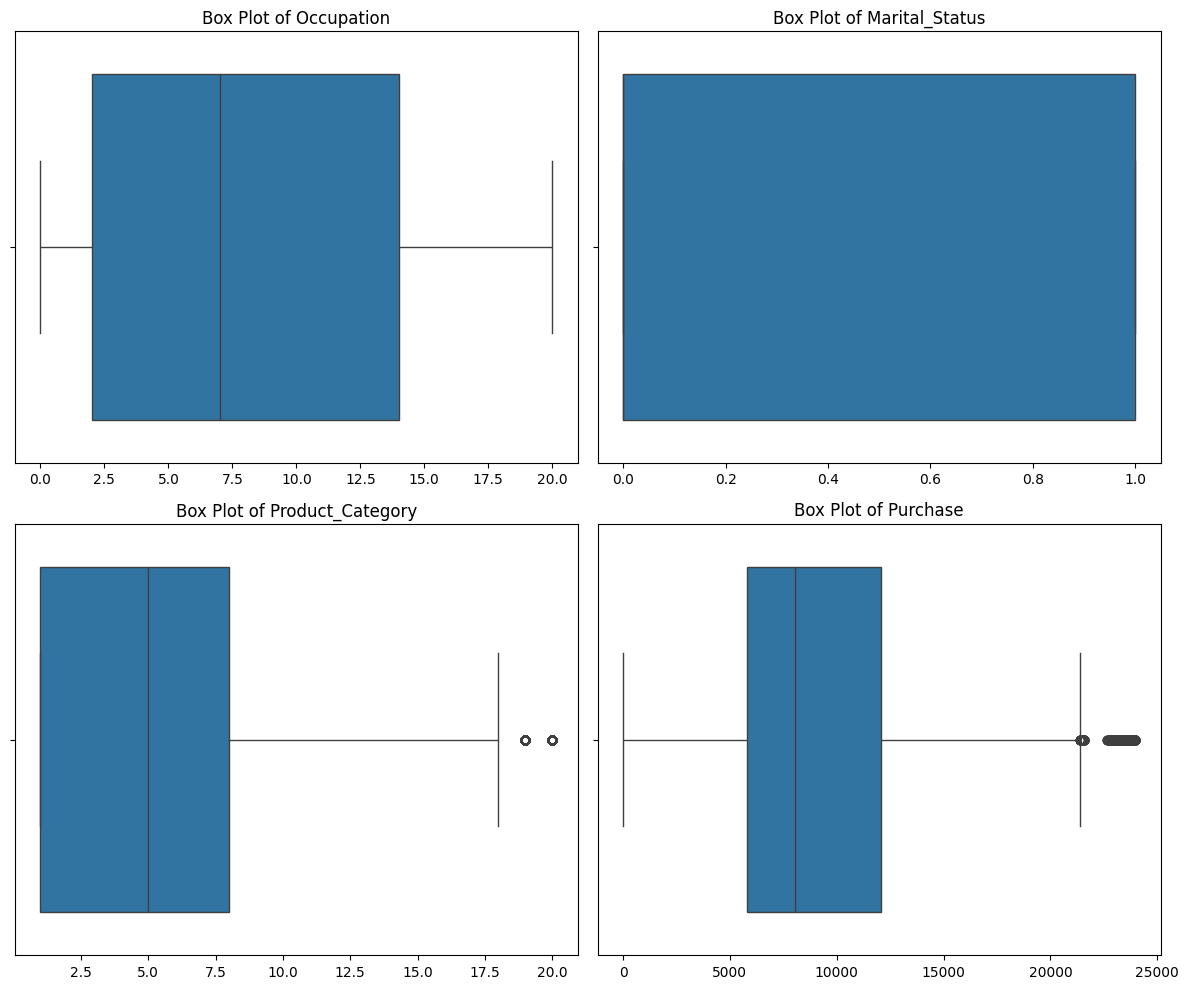

In [5]:
# Select the continuous variables
vars = ['Occupation', 'Marital_Status', 'Product_Category', 'Purchase']
# Create box plots
n_vars = len(vars)
n_cols = 2
n_rows = math.ceil(n_vars / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
axes = axes.flatten() # Flatten the axes array for easy iteration
for i, var in enumerate(vars):
    sns.boxplot(x=a[var], ax=axes[i])
    axes[i].set_title(f'Box Plot of {var}')
    axes[i].set_xlabel('') # Remove individual x-labels
plt.tight_layout()
plt.show()

In [6]:
# Categorize variables
categorical_vars = ['User_ID', 'Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Occupation', 'Marital_Status', 'Product_Category']
continuous_vars = ['Purchase']
print("Categorical Variables:", categorical_vars)
print("Continuous Variables:", continuous_vars)

Categorical Variables: ['User_ID', 'Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Occupation', 'Marital_Status', 'Product_Category']
Continuous Variables: ['Purchase']


Counting the occurrences of each unique value in the categorical variables and visualizing them


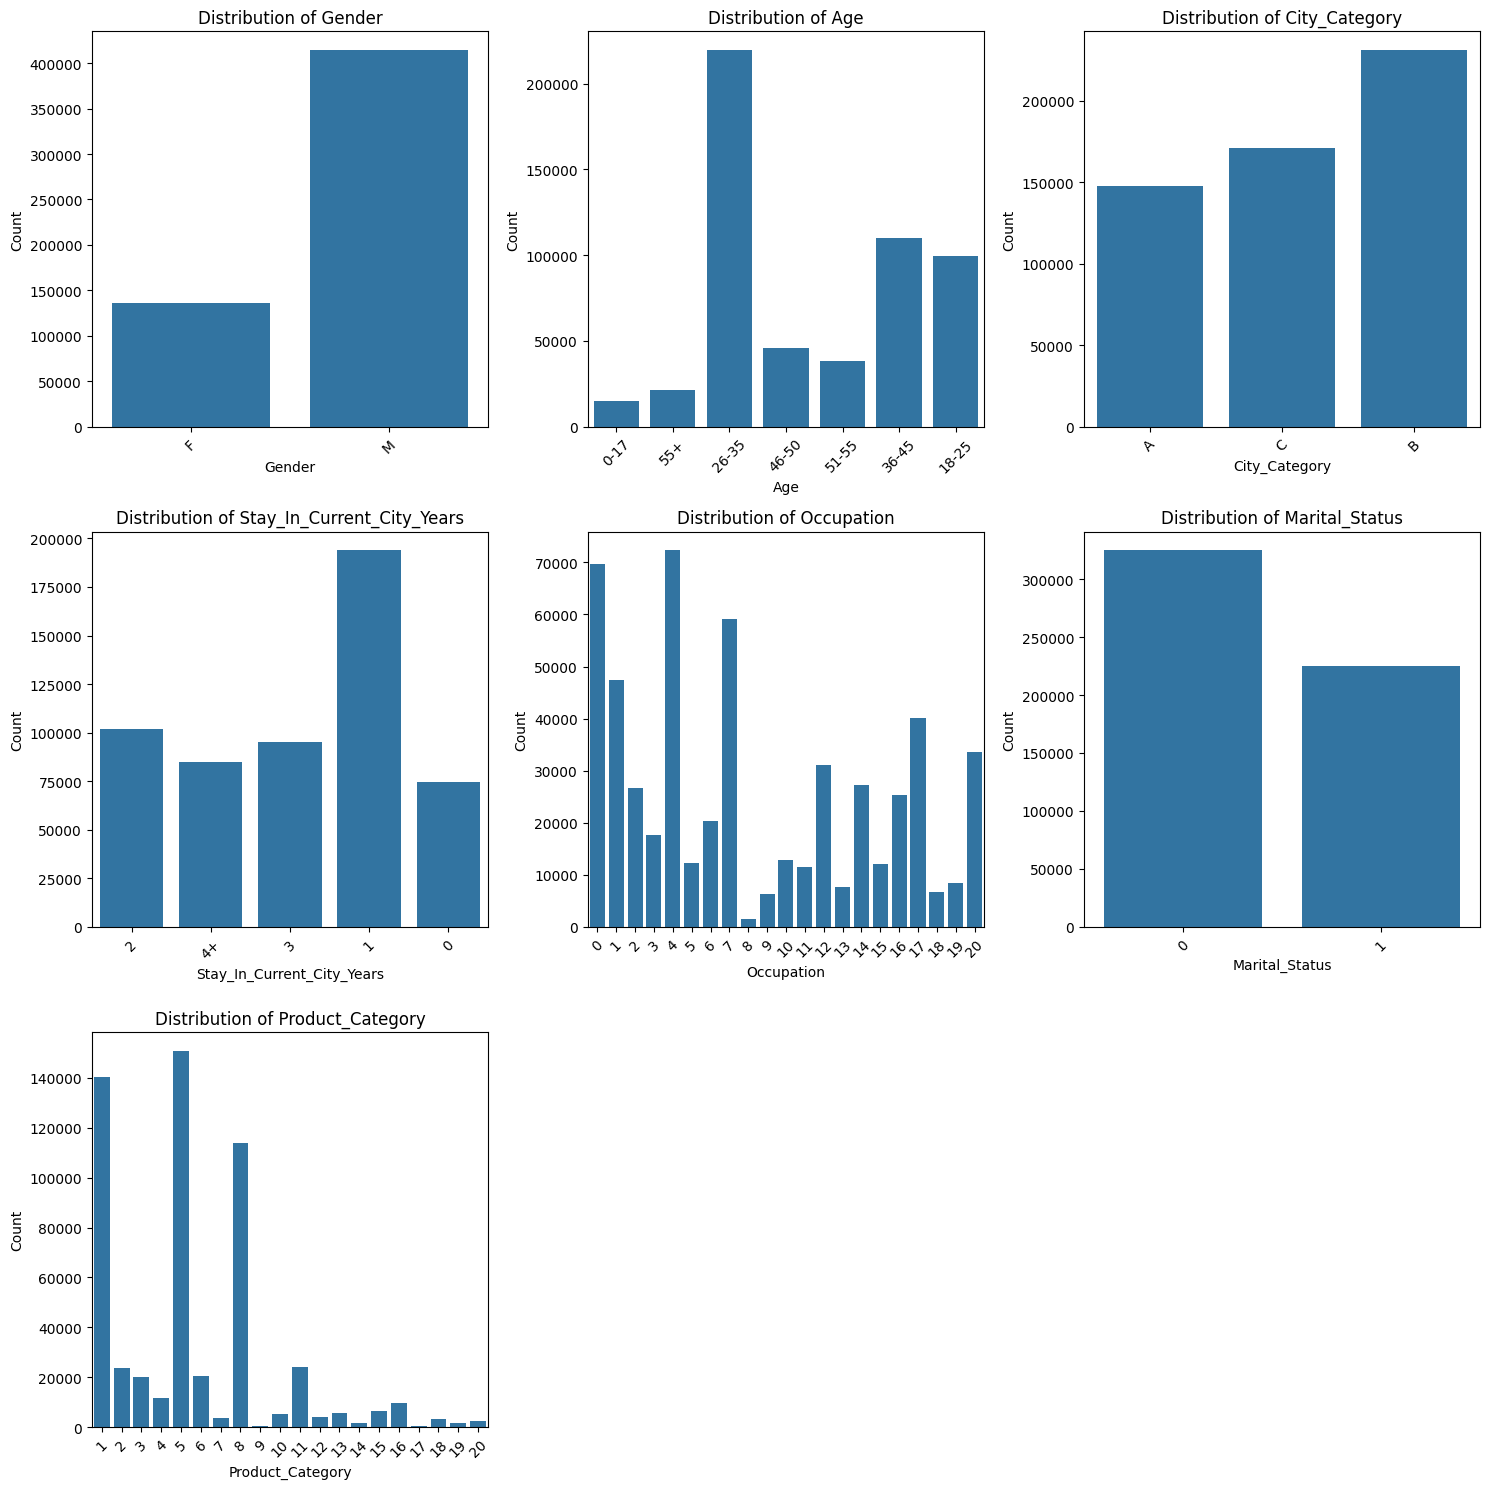

In [7]:
categorical_vars = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Occupation', 'Marital_Status', 'Product_Category']
# Determine the number of rows and columns for subplots
n_vars = len(categorical_vars)
n_cols = 3  # You can adjust the number of columns as needed
n_rows = math.ceil(n_vars / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the axes array for easy iteration
# Create count plots for each categorical variable in a subplot
for i, var in enumerate(categorical_vars):
    sns.countplot(x=a[var], ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Based on the data we conclude :
1.The number of men is more than 2 times the number of females where number of men is nearly 4 lakhs and number of females is between 10 to 15 lakhs.
2.The maximum number of people based on age group is from age 26-35 and minimum number of people based on age group is from age 0 to 17
3.B has the highest number of count in city_category
4.5 has the highest number of product category which is more than 140000 and 9,4 has minimum number of product category which is less than 5000

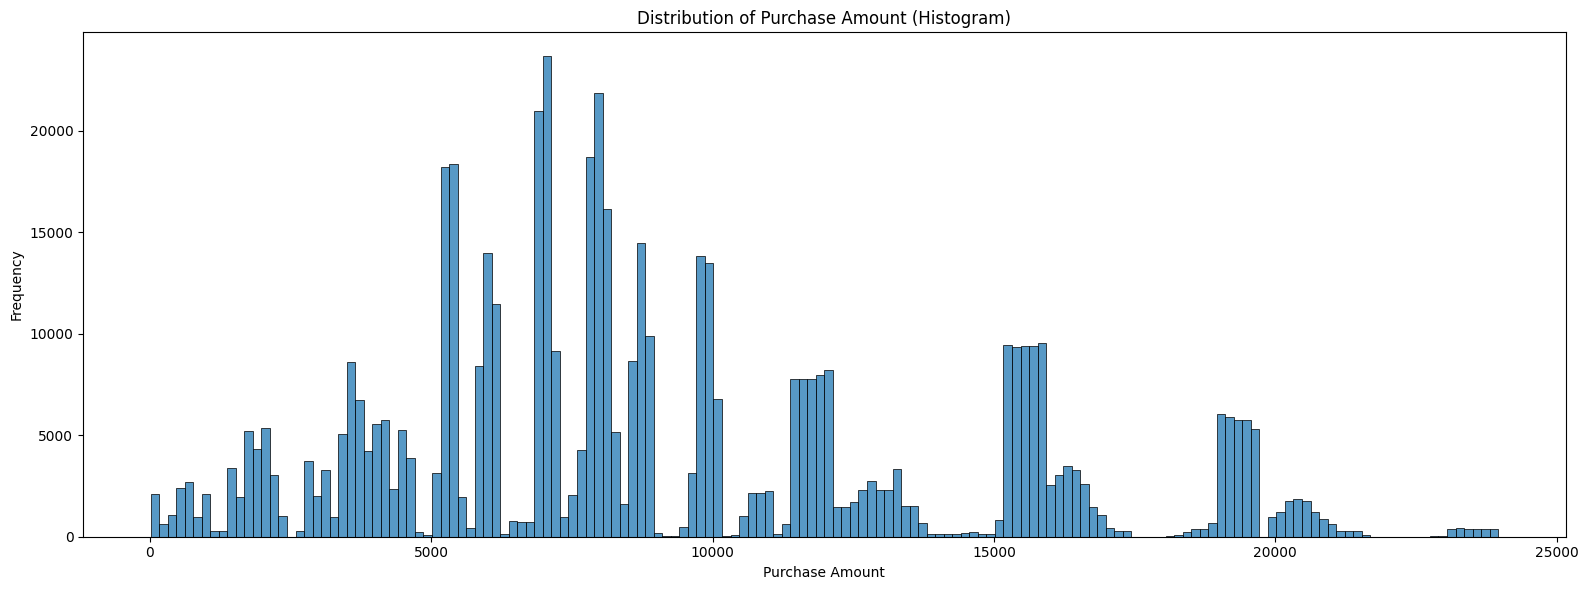

In [8]:
plt.figure(figsize=(16, 6))
sns.histplot(data=a, x='Purchase')
plt.title('Distribution of Purchase Amount (Histogram)')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Based on data,we conclude that many number of people have their purchase amount between 5000 and 10000

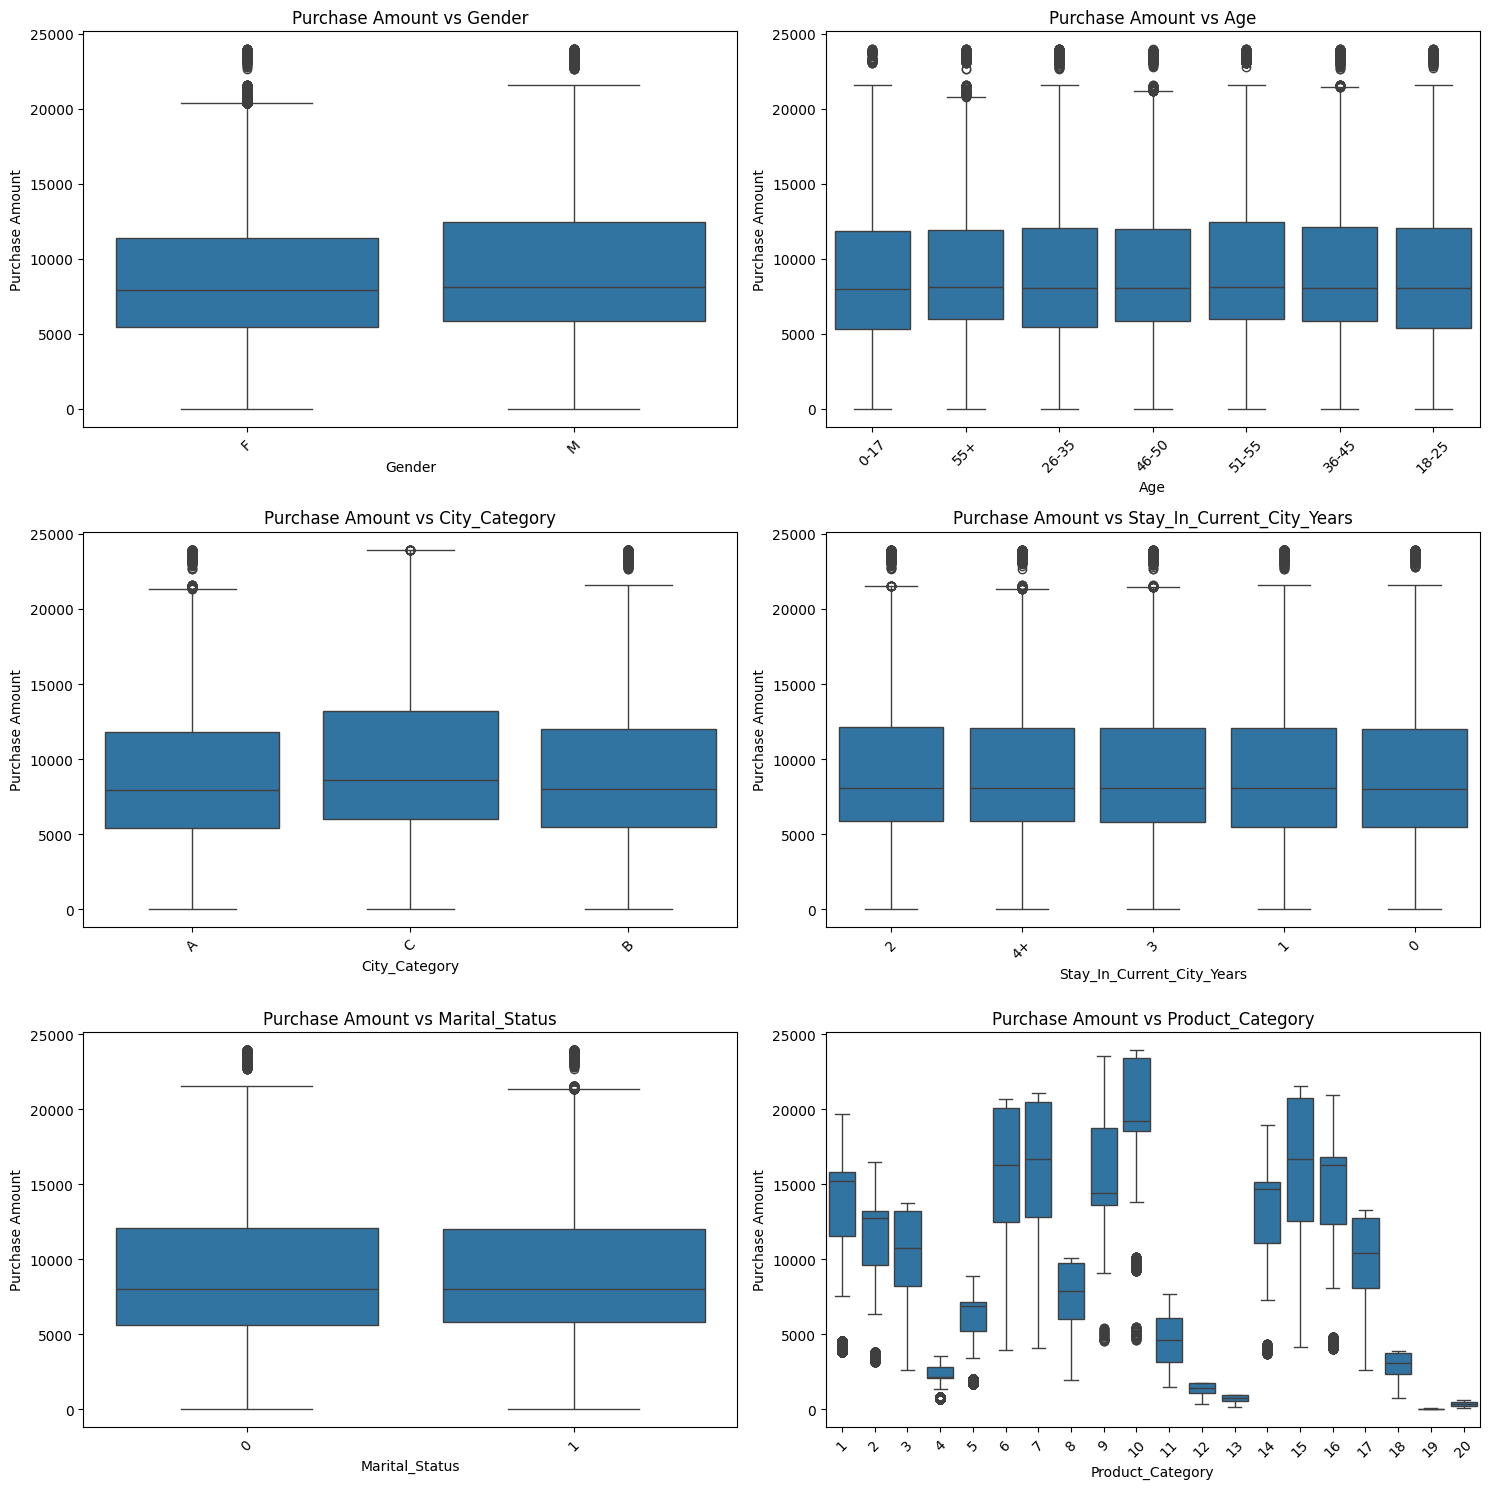

In [9]:
categorical_vars_for_comparison = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
n_vars = len(categorical_vars_for_comparison)
n_cols = 2  # You can adjust the number of columns as needed
n_rows = math.ceil(n_vars / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the axes array for easy iteration
for i, var in enumerate(categorical_vars_for_comparison):
    sns.boxplot(x=a[var], y=a['Purchase'], ax=axes[i])
    axes[i].set_title(f'Purchase Amount vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Purchase Amount')
    axes[i].tick_params(axis='x', rotation=45)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

Creating grouped bar plots to visualize the relationships between the specified pairs of categorical variables by counting the occurrences of each combination.

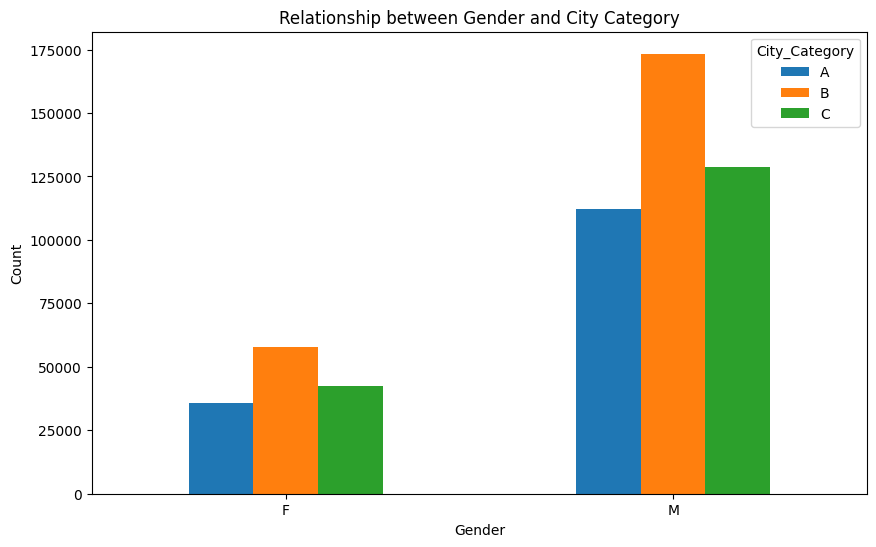

In [10]:
gender_city_counts = a.groupby(['Gender', 'City_Category']).size().unstack()
gender_city_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Relationship between Gender and City Category')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

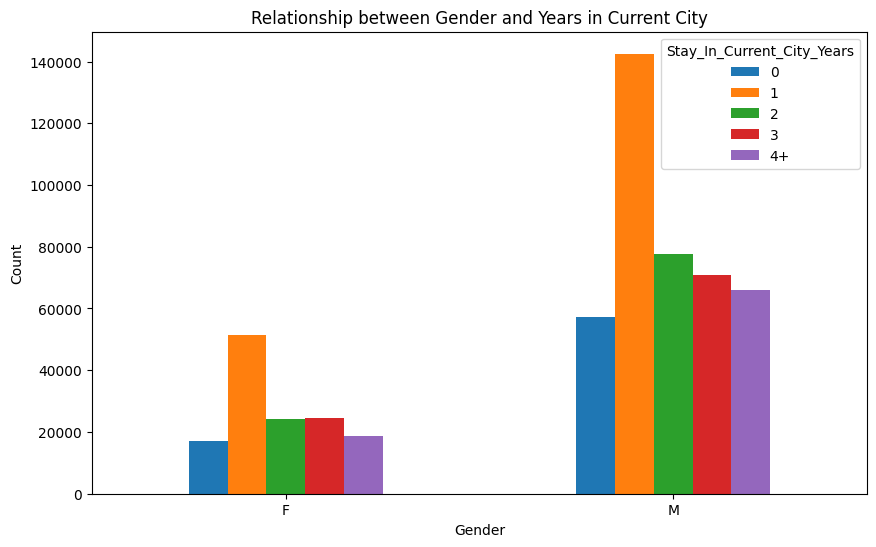

In [11]:
gender_stay_counts = a.groupby(['Gender', 'Stay_In_Current_City_Years']).size().unstack()
gender_stay_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Relationship between Gender and Years in Current City')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

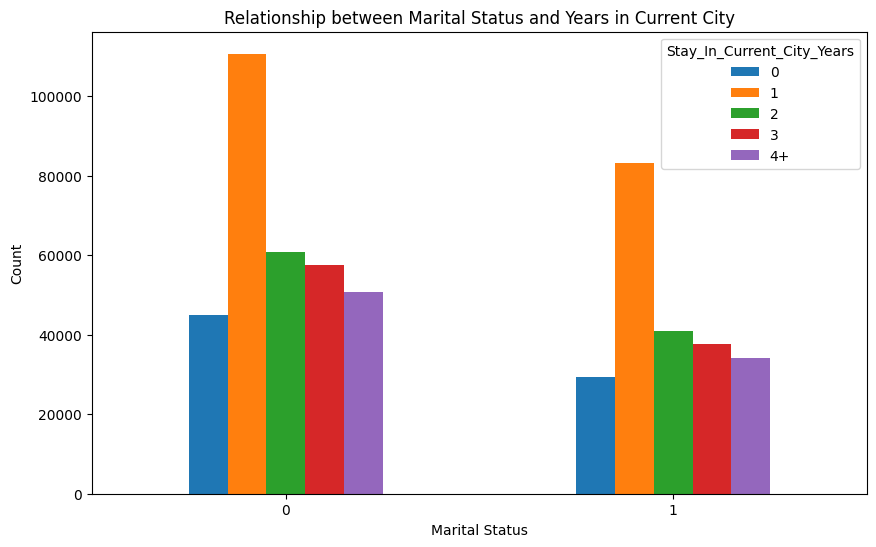

In [12]:
marital_stay_counts = a.groupby(['Marital_Status', 'Stay_In_Current_City_Years']).size().unstack()
marital_stay_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Relationship between Marital Status and Years in Current City')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Product Category Distribution by age group

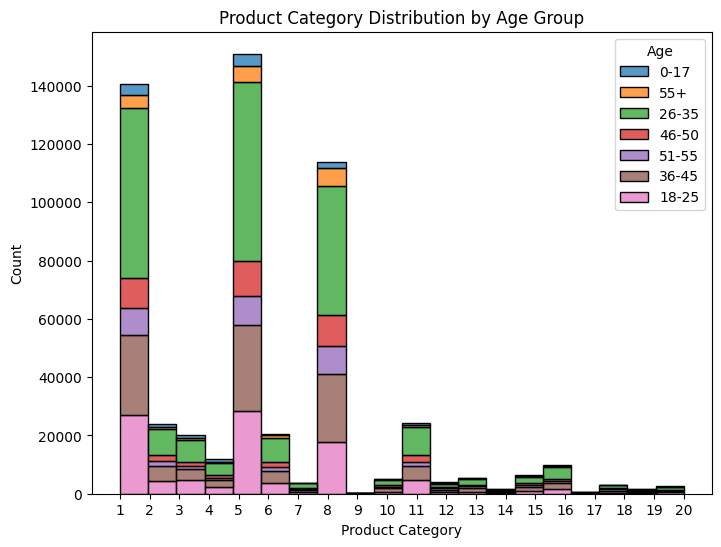

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(data=a, x='Product_Category', hue='Age', multiple='stack', bins=20)
plt.title('Product Category Distribution by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(range(1, 21))  # Set x-axis ticks to represent product categories
plt.show()

People with age group 26-35 buy more products which is above 140000 and product category '5' is most bought whereas product category '9' is least bought which is less than 5000

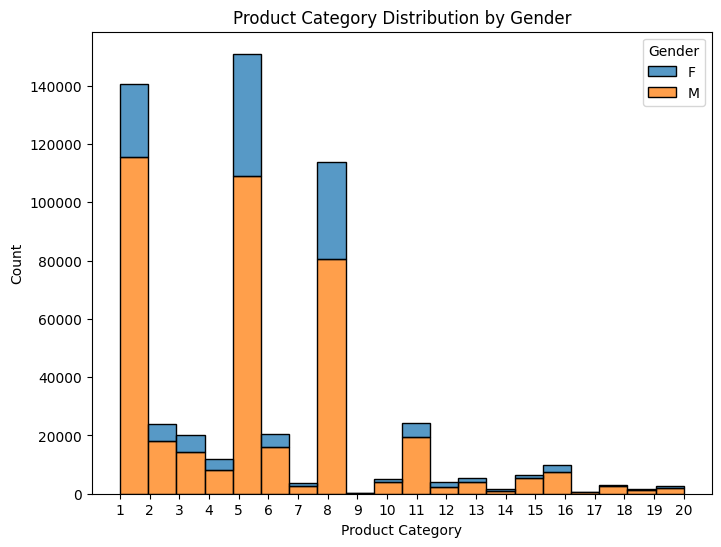

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(data=a, x='Product_Category', hue='Gender', multiple='stack', bins=20)
plt.title('Product Category Distribution by Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(range(1, 21))  # Set x-axis ticks to represent product categories
plt.show()

Confidence Interval of complete dataset

Regarding buying product category, females buy more in number when compared to males

In [17]:
def bootstrap_mean_ci(data, sample_size, n_bootstrap=1000):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        bootstrap_sample = data.sample(sample_size, replace=True)
        bootstrap_means.append(bootstrap_sample.mean())
    lower_bound = np.percentile(bootstrap_means, 2.5)
    upper_bound = np.percentile(bootstrap_means, 97.5)
    return lower_bound, upper_bound
# Separate data by gender
male_purchase = a[a['Gender'] == 'M']['Purchase']
female_purchase = a[a['Gender'] == 'F']['Purchase']
# Confidence intervals for the entire dataset
male_ci_full = bootstrap_mean_ci(male_purchase, len(male_purchase))
female_ci_full = bootstrap_mean_ci(female_purchase, len(female_purchase))
print(f"95% Confidence Interval for Male Purchase (Full Dataset): {male_ci_full}")
print(f"95% Confidence Interval for Female Purchase (Full Dataset): {female_ci_full}")

95% Confidence Interval for Male Purchase (Full Dataset): (np.float64(9420.890420485735), np.float64(9452.194866496564))
95% Confidence Interval for Female Purchase (Full Dataset): (np.float64(8709.75160850901), np.float64(8758.65265777673))


Confidence Interval for Different Sample Sizes

In [19]:
# Sample sizes for analysis
sample_sizes = [300, 3000, 30000]
# Confidence intervals for different sample sizes
male_cis = {}
female_cis = {}
for size in sample_sizes:
    male_cis[size] = bootstrap_mean_ci(male_purchase, size)
    female_cis[size] = bootstrap_mean_ci(female_purchase, size)
print("\n95% Confidence Intervals for Different Sample Sizes:")
for size in sample_sizes:
    print(f"Sample Size: {size}")
    print(f"  Male: {male_cis[size]}")
    print(f"  Female: {female_cis[size]}")


95% Confidence Intervals for Different Sample Sizes:
Sample Size: 300
  Male: (np.float64(8889.890166666668), np.float64(10024.29825))
  Female: (np.float64(8162.421249999999), np.float64(9252.017))
Sample Size: 3000
  Male: (np.float64(9254.974808333332), np.float64(9619.525258333333))
  Female: (np.float64(8559.899816666666), np.float64(8913.545533333332))
Sample Size: 30000
  Male: (np.float64(9381.733223333333), np.float64(9494.100978333334))
  Female: (np.float64(8682.100826666667), np.float64(8791.0895925))


In [22]:
male_width_full = male_ci_full[1] - male_ci_full[0]
female_width_full = female_ci_full[1] - female_ci_full[0]
print(f"Confidence interval width for full dataset:")
print(f"   Male: {male_width_full}")
print(f"   Female: {female_width_full}")
if male_width_full > female_width_full:
    print("The confidence interval for the full dataset is wider for males.")
else:
    print("The confidence interval for the full dataset is wider for females.")
print("This is likely due to the larger sample size for males in the dataset")
print("Thus it leads to a more precise estimate of the mean.")

Confidence interval width for full dataset:
   Male: 31.304446010828542
   Female: 48.90104926772074
The confidence interval for the full dataset is wider for females.
This is likely due to the larger sample size for males in the dataset
Thus it leads to a more precise estimate of the mean.


The confidence interval for the full dataset is wider for females.
This is likely due to the larger sample size for males in the dataset
Thus it leads to a more precise estimate of the mean.

In [27]:
print("Effect of sample size on confidence interval width:")
for size in sample_sizes:
    male_width = male_cis[size][1] - male_cis[size][0]
    female_width = female_cis[size][1] - female_cis[size][0]
    print(f"Sample Size {size}: Male Width = {male_width}, Female Width = {female_width}")
print("As the sample size increases, the width of the confidence interval decreases.")

Effect of sample size on confidence interval width:
Sample Size 300: Male Width = 1134.408083333332, Female Width = 1089.5957500000004
Sample Size 3000: Male Width = 364.55045000000064, Female Width = 353.645716666666
Sample Size 30000: Male Width = 112.36775500000113, Female Width = 108.98876583333367
As the sample size increases, the width of the confidence interval decreases.


As the sample size increases, the width of the confidence interval decreases.

In [28]:
print("\nOverlap of confidence intervals for different sample sizes:")
for i in range(len(sample_sizes)):
    for j in range(i + 1, len(sample_sizes)):
        size1 = sample_sizes[i]
        size2 = sample_sizes[j]
        male_overlap = max(0, min(male_cis[size1][1], male_cis[size2][1]) - max(male_cis[size1][0], male_cis[size2][0]))
        female_overlap = max(0, min(female_cis[size1][1], female_cis[size2][1]) - max(female_cis[size1][0], female_cis[size2][0]))
        print(f"Overlap between sample sizes {size1} and {size2}:")
        print(f"Male Overlap: {male_overlap}")
        print(f"Female Overlap: {female_overlap}")
print("Confidence intervals for different sample sizes generally overlap, especially for similar sample sizes.")


Overlap of confidence intervals for different sample sizes:
Overlap between sample sizes 300 and 3000:
Male Overlap: 364.55045000000064
Female Overlap: 353.645716666666
Overlap between sample sizes 300 and 30000:
Male Overlap: 112.36775500000113
Female Overlap: 108.98876583333367
Overlap between sample sizes 3000 and 30000:
Male Overlap: 112.36775500000113
Female Overlap: 108.98876583333367
Confidence intervals for different sample sizes generally overlap, especially for similar sample sizes.


Confidence intervals for different sample sizes generally overlap, especially for similar sample sizes.

Effect of sample size on the shape of the distributions of the means:
As the sample size increases,sample distribution means will be a normal distribution
This is based on Central Limit Theorem

In [37]:
def bootstrap_mean_ci(data, sample_size, n_bootstrap=1000):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        bootstrap_sample = data.sample(sample_size, replace=True)
        bootstrap_means.append(bootstrap_sample.mean())
    lower_bound = np.percentile(bootstrap_means, 2.5)
    upper_bound = np.percentile(bootstrap_means, 97.5)
    return lower_bound, upper_bound
# Separate data by Marital Status
married_purchase = a[a['Marital_Status'] == 1]['Purchase']
unmarried_purchase = a[a['Marital_Status'] == 0]['Purchase']
# Confidence intervals for the entire dataset
married_ci_full = bootstrap_mean_ci(married_purchase, len(married_purchase))
unmarried_ci_full = bootstrap_mean_ci(unmarried_purchase, len(unmarried_purchase))
print(f"95% Confidence Interval for Married Purchase (Full Dataset):")
print(married_ci_full)
print(f"95% Confidence Interval for Unmarried Purchase (Full Dataset):")
print(unmarried_ci_full)

95% Confidence Interval for Married Purchase (Full Dataset):
(np.float64(9240.844957552466), np.float64(9281.974385697866))
95% Confidence Interval for Unmarried Purchase (Full Dataset):
(np.float64(9248.732951504475), np.float64(9282.905825437054))


Confidence Intervals for different sample sizes

In [33]:
# Sample sizes for analysis
sample_sizes = [300, 3000, 30000]
married_cis = {}
unmarried_cis = {}
for size in sample_sizes:
    married_cis[size] = bootstrap_mean_ci(married_purchase, size)
    unmarried_cis[size] = bootstrap_mean_ci(unmarried_purchase, size)
print("\n95% Confidence Intervals for Different Sample Sizes:")
for size in sample_sizes:
    print(f"Sample Size: {size}")
    print(f"  Married: {married_cis[size]}")
    print(f"  Unmarried: {unmarried_cis[size]}")


95% Confidence Intervals for Different Sample Sizes:
Sample Size: 300
  Married: (np.float64(8708.796333333334), np.float64(9852.608166666667))
  Unmarried: (np.float64(8707.369999999999), np.float64(9830.23575))
Sample Size: 3000
  Married: (np.float64(9086.2384), np.float64(9438.539508333333))
  Unmarried: (np.float64(9102.034316666666), np.float64(9443.45775))
Sample Size: 30000
  Married: (np.float64(9206.055583333333), np.float64(9318.536369166666))
  Unmarried: (np.float64(9213.181444166667), np.float64(9324.238446666666))


In [34]:
married_width_full = married_ci_full[1] - married_ci_full[0]
unmarried_width_full = unmarried_ci_full[1] - unmarried_ci_full[0]
print(f"Confidence interval width for full dataset:")
print(f"Married: {married_width_full}")
print(f"Unmarried: {unmarried_width_full}")
if married_width_full > unmarried_width_full:
    print("The confidence interval for the full dataset is wider for married individuals.")
else:
    print("The confidence interval for the full dataset is wider for unmarried individuals.")
print("This is likely due to the larger sample size for unmarried individuals in the dataset")
print("Thus,it leads to a more precise estimate of the mean.")

Confidence interval width for full dataset:
Married: 40.1193307135527
Unmarried: 30.976870548236548
The confidence interval for the full dataset is wider for married individuals.
This is likely due to the larger sample size for unmarried individuals in the dataset
Thus,it leads to a more precise estimate of the mean.


The confidence interval for the full dataset is wider for married individuals.
This is likely due to the larger sample size for unmarried individuals in the dataset
Thus,it leads to a more precise estimate of the mean.

In [35]:
print("Effect of sample size on confidence interval width:")
for size in sample_sizes:
    married_width = married_cis[size][1] - married_cis[size][0]
    unmarried_width = unmarried_cis[size][1] - unmarried_cis[size][0]
    print(f"Sample Size {size}: Married Width = {married_width}, Unmarried Width = {unmarried_width}")
print("As the sample size increases, the width of the confidence interval decreases.")

Effect of sample size on confidence interval width:
Sample Size 300: Married Width = 1143.8118333333332, Unmarried Width = 1122.8657500000008
Sample Size 3000: Married Width = 352.3011083333331, Unmarried Width = 341.4234333333334
Sample Size 30000: Married Width = 112.48078583333336, Unmarried Width = 111.05700249999973
As the sample size increases, the width of the confidence interval decreases.


As the sample size increases, the width of the confidence interval decreases.

In [36]:
print("Overlap of confidence intervals for different sample sizes:")
for i in range(len(sample_sizes)):
    for j in range(i + 1, len(sample_sizes)):
        size1 = sample_sizes[i]
        size2 = sample_sizes[j]
        married_overlap = max(0, min(married_cis[size1][1],
                married_cis[size2][1]) - max(married_cis[size1][0], married_cis[size2][0]))
        unmarried_overlap = max(0, min(unmarried_cis[size1][1],
                unmarried_cis[size2][1]) - max(unmarried_cis[size1][0], unmarried_cis[size2][0]))
        print(f"Overlap between sample sizes {size1} and {size2}:")
        print(f"Married Overlap: {married_overlap}")
        print(f"Unmarried Overlap: {unmarried_overlap}")
print("Confidence intervals for different sample sizes generally overlap, especially for similar sample sizes.")

Overlap of confidence intervals for different sample sizes:
Overlap between sample sizes 300 and 3000:
Married Overlap: 352.3011083333331
Unmarried Overlap: 341.4234333333334
Overlap between sample sizes 300 and 30000:
Married Overlap: 112.48078583333336
Unmarried Overlap: 111.05700249999973
Overlap between sample sizes 3000 and 30000:
Married Overlap: 112.48078583333336
Unmarried Overlap: 111.05700249999973
Confidence intervals for different sample sizes generally overlap, especially for similar sample sizes.


Effect of sample size on the shape of the distributions of the means.Based on the Central Limit Theorem, as the sample size increases, the distribution of the sample means will approach a normal distribution, regardless of the shape of the original data distribution.

In [45]:
def bootstrap_mean_ci(data, sample_size, n_bootstrap=1000):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        bootstrap_sample = data.sample(sample_size, replace=True)
        bootstrap_means.append(bootstrap_sample.mean())
    lower_bound = np.percentile(bootstrap_means, 2.5)
    upper_bound = np.percentile(bootstrap_means, 97.5)
    return lower_bound, upper_bound
# Separate data by Age Group
age_groups = a['Age'].unique()
age_purchase_data = {age: a[a['Age'] == age]['Purchase'] for age in age_groups}
# Confidence intervals for the entire dataset
age_ci_full = {}
for age in age_groups:
    age_ci_full[age] = bootstrap_mean_ci(age_purchase_data[age], len(age_purchase_data[age]))
print("95% Confidence Intervals for Age Group Purchase (Full Dataset):")
for age, ci in age_ci_full.items():
    print(f"  Age Group {age}: {ci}")

95% Confidence Intervals for Age Group Purchase (Full Dataset):
  Age Group 0-17: (np.float64(8854.201312740035), np.float64(9012.006542179843))
  Age Group 55+: (np.float64(9272.925775437128), np.float64(9401.626413690477))
  Age Group 26-35: (np.float64(9231.438833127644), np.float64(9271.964136310437))
  Age Group 46-50: (np.float64(9164.082558368525), np.float64(9250.527381238922))
  Age Group 51-55: (np.float64(9480.133791330096), np.float64(9582.015152853171))
  Age Group 36-45: (np.float64(9302.764131966222), np.float64(9361.252354267222))
  Age Group 18-25: (np.float64(9139.355409391932), np.float64(9200.773851344571))


Confidence Interval for different sample sizes

In [46]:
# Sample sizes for analysis
sample_sizes = [300, 3000, 30000]
# Confidence intervals for different sample sizes
age_cis = {age: {} for age in age_groups}
for size in sample_sizes:
    for age in age_groups:
        # Ensure sample size is not larger than the group size
        current_sample_size = min(size, len(age_purchase_data[age]))
        if current_sample_size > 0:
            age_cis[age][size] = bootstrap_mean_ci(age_purchase_data[age], current_sample_size)
        else:
            age_cis[age][size] = (np.nan, np.nan) # Handle cases where sample size is too large
print("\n95% Confidence Intervals for Different Sample Sizes:")
for size in sample_sizes:
    print(f"Sample Size: {size}")
    for age in age_groups:
        print(f"  Age Group {age}: {age_cis[age][size]}")


95% Confidence Intervals for Different Sample Sizes:
Sample Size: 300
  Age Group 0-17: (np.float64(8347.6335), np.float64(9515.057916666665))
  Age Group 55+: (np.float64(8744.098833333333), np.float64(9908.786916666666))
  Age Group 26-35: (np.float64(8660.32125), np.float64(9801.642249999999))
  Age Group 46-50: (np.float64(8604.376999999999), np.float64(9796.453166666666))
  Age Group 51-55: (np.float64(8994.625083333332), np.float64(10160.9245))
  Age Group 36-45: (np.float64(8804.100916666666), np.float64(9934.276833333333))
  Age Group 18-25: (np.float64(8625.562333333333), np.float64(9803.573666666667))
Sample Size: 3000
  Age Group 0-17: (np.float64(8746.008083333334), np.float64(9120.194491666665))
  Age Group 55+: (np.float64(9142.364166666666), np.float64(9526.412258333334))
  Age Group 26-35: (np.float64(9080.818175), np.float64(9433.068766666667))
  Age Group 46-50: (np.float64(9036.371075), np.float64(9409.6519))
  Age Group 51-55: (np.float64(9361.656025), np.float64(9

In [47]:
age_widths_full = {age: ci[1] - ci[0] for age, ci in age_ci_full.items()}
for age, width in age_widths_full.items():
     print(f"   Age Group {age}: {width}")
widest_age_group_full = max(age_widths_full, key=age_widths_full.get)
print(f"   The confidence interval for the full dataset is widest for age group: {widest_age_group_full}")
print("   This is likely due to variations in sample size and standard deviation within each age group.")

   Age Group 0-17: 157.8052294398076
   Age Group 55+: 128.7006382533491
   Age Group 26-35: 40.52530318279241
   Age Group 46-50: 86.44482287039682
   Age Group 51-55: 101.88136152307561
   Age Group 36-45: 58.48822230100086
   Age Group 18-25: 61.418441952639114
   The confidence interval for the full dataset is widest for age group: 0-17
   This is likely due to variations in sample size and standard deviation within each age group.


The confidence interval for the full dataset is widest for age group: 0-17.This is likely due to variations in sample size and standard deviation within each age group.

In [48]:
print("Effect of sample size on confidence interval width:")
for size in sample_sizes:
    print(f"Sample Size {size}:")
    for age in age_groups:
        if size in age_cis[age]:
            width = age_cis[age][size][1] - age_cis[age][size][0]
            print(f"Age Group {age}: {width}")
        else:
             print(f"Age Group {age}: N/A (sample size too large)")
print("As the sample size increases, the width of the confidence interval generally decreases.")

Effect of sample size on confidence interval width:
Sample Size 300:
Age Group 0-17: 1167.424416666665
Age Group 55+: 1164.6880833333325
Age Group 26-35: 1141.320999999998
Age Group 46-50: 1192.0761666666676
Age Group 51-55: 1166.2994166666667
Age Group 36-45: 1130.175916666667
Age Group 18-25: 1178.0113333333338
Sample Size 3000:
Age Group 0-17: 374.1864083333312
Age Group 55+: 384.04809166666746
Age Group 26-35: 352.2505916666669
Age Group 46-50: 373.28082500000164
Age Group 51-55: 361.69514166666704
Age Group 36-45: 376.8141749999995
Age Group 18-25: 351.32137500000135
Sample Size 30000:
Age Group 0-17: 151.28393093629893
Age Group 55+: 130.59261997767862
Age Group 26-35: 111.32850583333311
Age Group 46-50: 112.89677083333481
Age Group 51-55: 114.90563333333193
Age Group 36-45: 115.35287333333326
Age Group 18-25: 122.22516666666706
As the sample size increases, the width of the confidence interval generally decreases.


In [49]:
print("Overlap of confidence intervals for different sample sizes:")
for age in age_groups:
    print(f"  Age Group {age}:")
    for i in range(len(sample_sizes)):
        for j in range(i + 1, len(sample_sizes)):
            size1 = sample_sizes[i]
            size2 = sample_sizes[j]
            if size1 in age_cis[age] and size2 in age_cis[age]:
                overlap = max(0, min(age_cis[age][size1][1],
                      age_cis[age][size2][1]) - max(age_cis[age][size1][0], age_cis[age][size2][0]))
                print(f"Overlap between sample sizes {size1} and {size2}: {overlap}")
            else:
                 print(f"Overlap between sample sizes {size1} and {size2}: N/A")
print("Confidence intervals for different sample sizes generally overlap, especially for similar sample sizes.")

Overlap of confidence intervals for different sample sizes:
  Age Group 0-17:
Overlap between sample sizes 300 and 3000: 374.1864083333312
Overlap between sample sizes 300 and 30000: 151.28393093629893
Overlap between sample sizes 3000 and 30000: 151.28393093629893
  Age Group 55+:
Overlap between sample sizes 300 and 3000: 384.04809166666746
Overlap between sample sizes 300 and 30000: 130.59261997767862
Overlap between sample sizes 3000 and 30000: 130.59261997767862
  Age Group 26-35:
Overlap between sample sizes 300 and 3000: 352.2505916666669
Overlap between sample sizes 300 and 30000: 111.32850583333311
Overlap between sample sizes 3000 and 30000: 111.32850583333311
  Age Group 46-50:
Overlap between sample sizes 300 and 3000: 373.28082500000164
Overlap between sample sizes 300 and 30000: 112.89677083333481
Overlap between sample sizes 3000 and 30000: 112.89677083333481
  Age Group 51-55:
Overlap between sample sizes 300 and 3000: 361.69514166666704
Overlap between sample sizes 300

Based on the Central Limit Theorem, as the sample size increases, the distribution of the sample means will approach a normal distribution, regardless of the shape of the original data distribution.

In [50]:
male_lower, male_upper = male_ci_full
female_lower, female_upper = female_ci_full
overlap = max(0, min(male_upper, female_upper) - max(male_lower, female_lower))
print(f"Overlap between Male and Female Confidence Intervals (Full Dataset): {overlap}")
if overlap > 0:
    print("The confidence intervals for the average amount spent by males and females overlap.")
else:
    print("The confidence intervals for the average amount spent by males and females do not overlap.")
if overlap > 0:
    print("The confidence intervals overlap")
    print("There is no statistical difference in average amount spent between males and females")
else:
    print("The confidence intervals do not overlap")
    print("There is a statistical difference in average amount spent between males and females.")

Overlap between Male and Female Confidence Intervals (Full Dataset): 0
The confidence intervals for the average amount spent by males and females do not overlap.
The confidence intervals do not overlap
There is a statistical difference in average amount spent between males and females.


  Walmart could consider:
  Tailoring marketing campaigns and product offerings to each gender based on their average spending.Investigating the reasons behind the difference in spending to identify opportunities for improvement.
  Analyzing which product categories contribute most to the difference in spending between genders.

In [52]:
married_lower, married_upper = married_ci_full
unmarried_lower, unmarried_upper = unmarried_ci_full
overlap = max(0, min(married_upper, unmarried_upper) - max(married_lower, unmarried_lower))
print(f"Overlap between Married and Unmarried Confidence Intervals (Full Dataset): {overlap}")
if overlap > 0:
    print("The confidence intervals for the average amount spent by married and unmarried individuals overlap.")
else:
    print("The confidence intervals for the average amount spent by married and unmarried individuals do not overlap.")

Overlap between Married and Unmarried Confidence Intervals (Full Dataset): 33.24143419339089
The confidence intervals for the average amount spent by married and unmarried individuals overlap.


Walmart can consider:
Since the confidence intervals overlap, it suggests that there might not be a statistically significant difference in the average amount spent between married and unmarried individuals across the entire dataset. Implementing similar marketing strategies for both groups.
Analyzing spending patterns within specific product categories or age groups to identify potential differences.
Focusing on other factors that might influence purchase amount, such as product category, age, or location.

In [53]:
age_groups = a['Age'].unique()
age_ci_full = {}
for age in age_groups:
    age_ci_full[age] = bootstrap_mean_ci(age_purchase_data[age], len(age_purchase_data[age]))
print("Overlap of Confidence Intervals for Different Age Groups (Full Dataset):")
for i in range(len(age_groups)):
    for j in range(i + 1, len(age_groups)):
        age1 = age_groups[i]
        age2 = age_groups[j]
        ci1_lower, ci1_upper = age_ci_full[age1]
        ci2_lower, ci2_upper = age_ci_full[age2]
        overlap = max(0, min(ci1_upper, ci2_upper) - max(ci1_lower, ci2_lower))
        print(f"  Overlap between Age Group {age1} and Age Group {age2}: {overlap}")

Overlap of Confidence Intervals for Different Age Groups (Full Dataset):
  Overlap between Age Group 0-17 and Age Group 55+: 0
  Overlap between Age Group 0-17 and Age Group 26-35: 0
  Overlap between Age Group 0-17 and Age Group 46-50: 0
  Overlap between Age Group 0-17 and Age Group 51-55: 0
  Overlap between Age Group 0-17 and Age Group 36-45: 0
  Overlap between Age Group 0-17 and Age Group 18-25: 0
  Overlap between Age Group 55+ and Age Group 26-35: 6.177104973327005
  Overlap between Age Group 55+ and Age Group 46-50: 0
  Overlap between Age Group 55+ and Age Group 51-55: 0
  Overlap between Age Group 55+ and Age Group 36-45: 61.40994382482131
  Overlap between Age Group 55+ and Age Group 18-25: 0
  Overlap between Age Group 26-35 and Age Group 46-50: 21.634471624909565
  Overlap between Age Group 26-35 and Age Group 51-55: 0
  Overlap between Age Group 26-35 and Age Group 36-45: 0
  Overlap between Age Group 26-35 and Age Group 18-25: 0
  Overlap between Age Group 46-50 and Age

Analyzing the overlap of confidence intervals between different age groups can provide insights into whether there are statistically significant differences in average spending between these groups. Walmart can leverage this information to:
**Tailor marketing strategies:** If there are significant differences in average spending, Walmart can develop targeted marketing campaigns for specific age groups.
**Optimize product offerings:** Walmart can optimize product assortments and promotions


## Recommendations for Walmart:

Based on the analysis of purchase amounts across Gender, Marital Status, and Age groups using confidence intervals and bootstrapping, here are some recommendations for Walmart:

**Overall:**

*   **Leverage Gender Differences:** The confidence intervals for average male and female purchase amounts did not overlap, indicating a statistically significant difference. Walmart should continue to analyze and potentially tailor marketing and product strategies based on gender-specific spending patterns.
*   **Consider Marital Status in conjunction with other factors:** While the confidence intervals for married and unmarried individuals overlapped, suggesting no statistically significant difference in average spending across the entire dataset, Walmart should not completely disregard this demographic. Further analysis within specific product categories or in combination with other factors like age and location might reveal valuable insights for targeted strategies.
*   **Implement Age-Based Targeting:** The analysis showed varying degrees of overlap in confidence intervals between different age groups, and some age groups (like 0-17 compared to others) had no overlap at all. This highlights the importance of age-based targeting. Walmart should:
    *   Develop marketing campaigns and product assortments that resonate with the specific spending habits and preferences of different age segments.
    *   Focus on optimizing offerings for age groups with higher average spending or those showing distinct purchasing behaviors.

**Specific Actions:**

*   **Gender-Specific Strategies:**
    *   Analyze popular product categories and brands among male and female customers.
    *   Develop targeted promotions and advertising that appeal to each gender's interests.
    *   Consider store layouts and product placements that cater to the shopping patterns of both genders.
*   **Age-Based Optimization:**
    *   Tailor promotions and discounts to the products most frequently purchased by different age segments.
    *   Consider creating age-specific loyalty programs
    *   Analyze the spending patterns of the 26-35 age group, as they represent the largest segment of the customer base and have a significant impact on overall purchase amounts.
By leveraging these insights, Walmart can refine its marketing strategies, optimize product offerings, and enhance the overall customer experience to drive sales and profitability.